<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Обработка пропусков</a></span></li><li><span><a href="#Замена-типа-данных" data-toc-modified-id="Замена-типа-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Замена типа данных</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
df=pd.read_csv('/datasets/real_estate_data.csv')
display(df.head(10))

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...
5,10\t2890000.0\t30.4\t2018-09-10T00:00:00\t1\t\...
6,6\t3700000.0\t37.3\t2017-11-02T00:00:00\t1\t\t...
7,5\t7915000.0\t71.6\t2019-04-18T00:00:00\t2\t\t...
8,20\t2900000.0\t33.16\t2018-05-23T00:00:00\t1\t...
9,18\t5400000.0\t61.0\t2017-02-26T00:00:00\t3\t2...


Как можно заметить, таблица вышла "нечитаемой" ввиду того, что данные разделены не запятой, а **/t**. Исправим этот момент, применив разделитель колонок **sep**

In [2]:
df=pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
display(df.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Таблица стала читаемой. Изучим информацию о таблице, воспользовавшись методом **info()**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

**Вывод**

В талице 22 столбца и 23699 строк. В столбцах представлены данные типа **int**, **float**, **object** и **bool**. 

Согласно документации к данным:

**airports_nearest** — расстояние до ближайшего аэропорта в метрах (м)
**balcony** — число балконов
**ceiling_height** — высота потолков (м)
**cityCenters_nearest** — расстояние до центра города (м)
**days_exposition** — сколько дней было размещено объявление (от публикации до снятия)
**first_day_exposition** — дата публикации
**floor** — этаж
**floors_total** — всего этажей в доме
**is_apartment** — апартаменты (булев тип)
**kitchen_area** — площадь кухни в квадратных метрах (м²)
**last_price** — цена на момент снятия с публикации
**living_area** — жилая площадь в квадратных метрах (м²)
**locality_name** — название населённого пункта
**open_plan** — свободная планировка (булев тип)
**parks_around3000** — число парков в радиусе 3 км
**parks_nearest** — расстояние до ближайшего парка (м)
**ponds_around3000** — число водоёмов в радиусе 3 км
**ponds_nearest** — расстояние до ближайшего водоёма (м)
**rooms** — число комнат
**studio** — квартира-студия (булев тип)
**total_area** — площадь квартиры в квадратных метрах (м²)
**total_images** — число фотографий квартиры в объявлении

В каждой строке таблицы представлены данные о объявлении по продаже квартиры. Предварительно, данных достаточно для ответа на поставленные вопросы. Однако до этого необходимо произвести предобработку данных

## Предобработка данных

### Обработка пропусков

Для начала выведем общее количество пропусков в таблице

In [4]:
print(df.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


Пропусков в таблице много. Начнем с простого: скорее всего, пропуски в столбцах **balcony** появились ввиду отсутствия балкона в квартире, и их просто не указали в объявлении. Потому заменим пропуски на нулевые значения. 

In [5]:
df['balcony'] = df['balcony'].fillna(0)
print(df['balcony'].unique()) #выведем уникальные значения

[0. 2. 1. 5. 4. 3.]


Количество балконов варируется от 0 до 5. Проверим объявления, где балконов больше трех, ибо квартира с площадью в 30 квадратных метров и пятью балконами звучит неправдоподобно

In [6]:
display(df[df['balcony']>3].tail())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23363,10,4300000.0,52.00,2019-04-21T00:00:00,1,2.70,16.0,28.0,8,False,...,11.0,5.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23474,16,5900000.0,40.50,2019-03-16T00:00:00,2,2.73,17.0,31.0,16,NaN,...,5.0,4.0,Санкт-Петербург,19901.0,21613.0,0.0,NaN,1.0,1003.0,NaN
23497,17,6150000.0,55.40,2019-04-22T00:00:00,2,2.80,20.0,29.4,16,NaN,...,9.6,4.0,Санкт-Петербург,16285.0,13873.0,0.0,NaN,1.0,481.0,NaN
23526,14,5800000.0,60.69,2018-03-13T00:00:00,3,2.50,9.0,39.7,2,NaN,...,6.2,5.0,Санкт-Петербург,51239.0,15954.0,0.0,NaN,0.0,NaN,30.0
23549,5,19600000.0,184.00,2016-04-21T00:00:00,3,3.00,19.0,55.7,19,False,...,24.5,5.0,Санкт-Петербург,18995.0,4837.0,0.0,NaN,0.0,NaN,205.0


"Однушка" с пятью балконами не вызывает доверия. Учтем это в случае необходимости, когда перейдем к самому анализу данных, а пока продолжим работу с пропусками

Скорее всего, ситуация с пропусками в столбце **is_apartment** аналогична: пользователь просто пропустил эту графу, если его квартира не является апартаментами. Либо это графа появилась на сайте совсем недавно, и во всех предыдущих объявлениях она автоматически стала пропуском. Потому заменим пропуски на **False**

In [7]:
df['is_apartment'] = df['is_apartment'].fillna(False)

Далее разберемся с пропусками в столбце **ceiling_height**. Конечно, было бы проще, если бы мы знали год постройки, поскольку еще в царское время строили доходные дома (их особенно много в Петербурге), где высота потолков была от 3 метров, а в "хрущевках" же - 2,50. Но, поскольку этими данными мы не располагаем, заменим пропуски на медианное значение, что является допустимым для количественных переменных

In [8]:
#df=df.dropna(subset=['ceiling_height']).reset_index(drop=True) - пробовал решить и таким способом
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

Далее разберемся с пропусками в столбе **floors_total**. К сожалению, от этого параметра впоследствии будет зависеть разделение на этажи: "первый", "последний" и "другой". Посчитать медиану в данном случае будет не верно, потому удалим значения.
Также удалим пропуски в столбце **locality_name**, поскольку объявления без названия населенного пункта не являются информативными для пользователя.

In [9]:
df=df.dropna(subset=['floors_total', 'locality_name'])
print(df.isna().sum()) #посмотрим на оставшиеся пропуски

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1865
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64


Видно, что в некоторых случаях количество пропусков либо совпадают, либо очень близко друг к другу. Скорее всего, данные ставит программа автоматически в зависимости от указанной локации на карте. Пропуски в этих столбцах пока оставим без изменения. 
Также поступим со столбцами **living_area** и **kitchen_area**. Поскольку планировка может быть сколь угодно разной, в том числе в зависимости от метража квартиры, будет не верно считать медианные или средние значения для замены пропусков. Потому продолжим предообработку данных

**Вывод**

В результате обработки пропусков, были удалены строки с отсутствием значений в столбцах **floors_total**, **days_exposition**, **locality_name**. В объявлениях, где не указано количество балконов, поставили нулевые значения. Аналогично поступили со столбцом **is_apartment**. Объявлений с пропусками в столбце **ceiling_height** почти 50% от общего числа, потому заменили пропуски на медианное значение

### Замена типа данных

Прежде, чем перейти к непосредственной замене типа данных в столбах, исправим название столбца **cityCenters_nearest**, приведя его к "змеиному" регистру, чтобы не "резало" глаза:

In [10]:
df.rename(columns={ df.columns[16]: "city_centers_nearest" }, inplace = True)
display(df.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,False,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,False,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Выглядит явно лучше!
Обратим внимание на столбец **first_day_exposition**. Здесь ограничимся точностью до дня, поскольку точное время не указано

In [11]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%d')

Для каких-то данных (как например, высота потолков) логично оставить тип данных **float**, но для столбцов **last_price**, **balcony**, **floors_total**	 и **days_exposition** целесообразно верейти к формату целых чисел.

In [12]:
df[['last_price', 'floors_total', 'balcony']] = df[['last_price', 'floors_total', 'balcony']].astype('int')
df['days_exposition']=df[df['days_exposition'].notnull()]['days_exposition'].astype('int')

Конечно, имеет смысл перейти к целым числам и в столбцах с количеством парков/торговых центров/водоемов и расстоянием до них, но ввиду присутствия пропусков в таковых, опустим этом момент. Посмотрим на нашу таблицу перед тем, как перейти к последующим пунктам задания.

In [13]:
display(df.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,False,...,11.00,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,False,...,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.00,2015-07-24,3,2.65,14,NaN,9,False,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,False,...,9.10,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000,37.30,2017-11-02,1,2.65,26,10.60,6,False,...,14.40,1,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000,71.60,2019-04-18,2,2.65,24,NaN,22,False,...,18.90,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000,33.16,2018-05-23,1,2.65,27,15.43,26,False,...,8.81,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,6.50,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


**Вывод**

Столбец **first_day_exposition** был переведен к временному формату. Также определенные столбцы привели к типу int.

## Расчёты и добавление результатов в таблицу

Добавим цену квадратного метра в таблицу:

In [14]:
df['price_per_meter'] = df['last_price']/df['total_area']
df['price_per_meter'] = df['price_per_meter'].astype('int') #переведем для удобства к формату целых чисел

Для каждого объявления опеределим день недели, месяц и год, в которые таковое было опубликовано:

In [15]:
df['weekday_exposition'] = df['first_day_exposition'].dt.weekday
df['month_exposition'] = df['first_day_exposition'].dt.month
df['year_exposition'] = df['first_day_exposition'].dt.year

Напишем функцию, которая будет определять этаж квартиры, выдавая результат "первый", "последний", "другой". Создадим столбец **floor_category**, куда поместим результат применения функции к столбцу **floor**

In [16]:
def tell_me_the_floor(row):
    floor = row['floor']
    total = row['floors_total']
    if floor == 1:
        return 'первый'
    if floor == total:
        return 'последний'
    elif 1 < floor < total:
        return 'другой'
    
df['floor_category'] = df.apply(tell_me_the_floor, axis=1)   

Определим соотношения жилой площади к общей и площади кухни к общей:

In [17]:
df['living_area_ratio'] = df['living_area'] / df['total_area'] #соотношение жилой площади к общей
df['kitchen_area_ratio'] = df['kitchen_area'] / df['total_area'] #соотношение площади кухни к жилой

Посмотрим, как теперь выглядит наша таблица:

In [18]:
display(df.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,weekday_exposition,month_exposition,year_exposition,floor_category,living_area_ratio,kitchen_area_ratio
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,2.0,755.0,NaN,120370,3,3,2019,другой,0.472222,0.231481
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,False,...,0.0,NaN,81.0,82920,1,12,2018,первый,0.460396,0.272277
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,False,...,2.0,574.0,558.0,92785,3,8,2015,другой,0.612500,0.148214
3,0,64900000,159.00,2015-07-24,3,2.65,14,NaN,9,False,...,3.0,234.0,424.0,408176,4,7,2015,другой,NaN,NaN
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,1.0,48.0,121.0,100000,1,6,2018,другой,0.320000,0.410000
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,False,...,NaN,NaN,55.0,95065,0,9,2018,другой,0.473684,0.299342
6,6,3700000,37.30,2017-11-02,1,2.65,26,10.60,6,False,...,0.0,NaN,155.0,99195,3,11,2017,другой,0.284182,0.386059
7,5,7915000,71.60,2019-04-18,2,2.65,24,NaN,22,False,...,0.0,NaN,NaN,110544,3,4,2019,другой,NaN,0.263966
8,20,2900000,33.16,2018-05-23,1,2.65,27,15.43,26,False,...,NaN,NaN,189.0,87454,2,5,2018,другой,0.465320,0.265682
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,0.0,NaN,289.0,88524,6,2,2017,другой,0.714754,0.106557


У нас есть незаполненные значения в столбцах **living_area_ratio** и **kitchen_area_ratio**. их появление логично, поскольку возникли они только в тех столбцах, где не указаны размеры жилой площади и/или размеры кухни. Данные пропуски не критичны, поскольку прямых вопросов, связанных с этими параметрами нет

**Вывод**

В таблицу были добавлены:

цена квадратного метра;
день недели, месяц и год публикации объявления;
этаж квартиры из вариантов — первый, последний, другой;
соотношение жилой и общей площади, а также отношение площади кухни к общей.

## Исследовательский анализ данных

Изучим площадь, цену, количество комнат и высоту потолков. Для каждого случая вызовем метод **describe()** и построим гистрограммы:

count   23,565.00
mean        60.32
std         35.66
min         12.00
25%         40.00
50%         52.00
75%         69.70
max        900.00
Name: total_area, dtype: float64

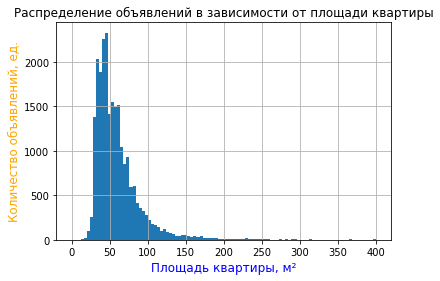

In [19]:
import matplotlib.pyplot as plt #импортируем библиотеку, которая позволит нам строить сложные графики
df['total_area'].plot(kind='hist', bins=100, title='Распределение объявлений в зависимости от площади квартиры', grid=True, range=(0,400))
ax = plt.gca()
ax.set_xlabel("Площадь квартиры, м²", fontsize=12, color='blue')
ax.set_ylabel("Количество объявлений, ед.", fontsize=12, color='orange')
pd.set_option('display.float_format', '{:,.2f}'.format)
df['total_area'].describe()

Мы получили распределение Пуассона. На первый взгляд - с данными все в порядке. Все площади квартир находятся в диапазоне от 12 до 900 м². Медианное значение - 50,8 м²

count        23,565.00
mean      6,540,058.26
std      10,910,934.72
min          12,190.00
25%       3,400,000.00
50%       4,646,000.00
75%       6,790,000.00
max     763,000,000.00
Name: last_price, dtype: float64

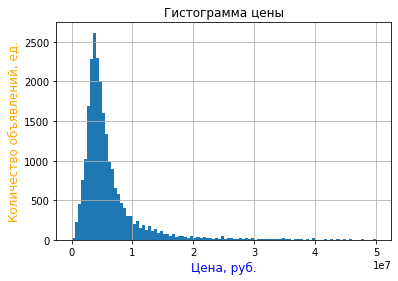

In [20]:
df['last_price'].plot(kind='hist', title='Гистограмма цены', grid=True, bins=100, range=(20000,50000000))
ax = plt.gca()
ax.set_xlabel("Цена, руб.", fontsize=12, color='blue')
ax.set_ylabel("Количество объявлений, ед.", fontsize=12, color='orange')
df['last_price'].describe()

Мы получили Гауссово распределение, что уже является хорошим знаком, но квартира за 12190 рублей не внушает доверия. Впоследствии избавимся от подобных значений

count   23,565.00
mean         2.07
std          1.08
min          0.00
25%          1.00
50%          2.00
75%          3.00
max         19.00
Name: rooms, dtype: float64

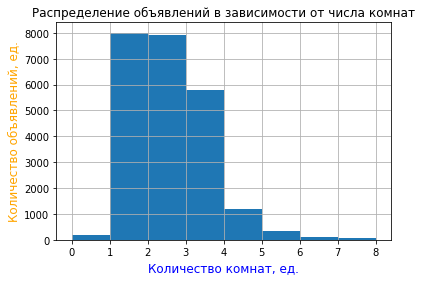

In [21]:
df['rooms'].plot(kind='hist', title='Распределение объявлений в зависимости от числа комнат', grid=True, bins=8, range=(0,8))
ax = plt.gca()
ax.set_xlabel("Количество комнат, ед.", fontsize=12, color='blue')
ax.set_ylabel("Количество объявлений, ед.", fontsize=12, color='orange')
df['rooms'].describe()

Конечно, 0 комнат - это что-то странное, но от выбивающихся значений мы избавимся позже. В целом, распределение выглядит правдоподобным: больше всего "однушек", далее "двушки" и тд.

count   23,565.00
mean         2.72
std          0.99
min          1.00
25%          2.60
50%          2.65
75%          2.70
max        100.00
Name: ceiling_height, dtype: float64

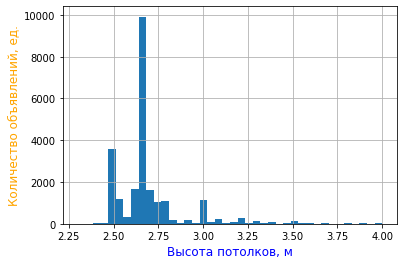

In [22]:
df['ceiling_height'].plot(kind = 'hist', bins=40, grid=True, range=(2.3,4))
ax = plt.gca()
ax.set_xlabel("Высота потолков, м", fontsize=12, color='blue')
ax.set_ylabel("Количество объявлений, ед.", fontsize=12, color='orange')
df['ceiling_height'].describe()

На полученной гистограмме явно выделяется пик - это наша медиана, на которую мы заменяли пропуски. Конечно, такие значения, как 1 и 100 метров являются ошибочными. Поскольку первый и третий квартили расположены максимально близко к медиане, удаление с помощью "ящика с усами" корректным не будет, оно отбросит множество верных значений. Потому последующий отсев выбросов будем производить, опираясь на логические суждения.

Далее построим гистограмму времени продажи:

count   20,394.00
mean       180.74
std        219.73
min          1.00
25%         45.00
50%         95.00
75%        231.00
max      1,580.00
Name: days_exposition, dtype: float64

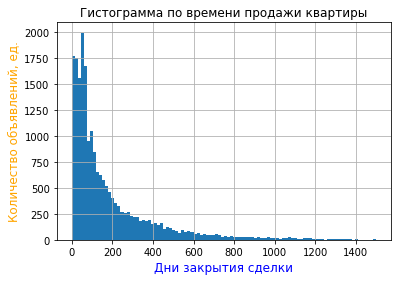

In [23]:
df['days_exposition'].plot(kind='hist', title='Гистограмма по времени продажи квартиры', bins = 100, grid=True, range=(0,1500))
ax = plt.gca()
ax.set_xlabel("Дни закрытия сделки", fontsize=12, color='blue')
ax.set_ylabel("Количество объявлений, ед.", fontsize=12, color='orange')
df['days_exposition'].describe()

Среднее время продажи - почти 181 день, медианное значение - 95 дней.
На гистограмме видно несколько пиков. Изучим юолее подробно интервал от 0 до 200 дней:

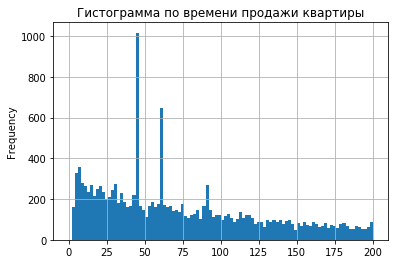

In [24]:
df['days_exposition'].plot(kind='hist', title='Гистограмма по времени продажи квартиры', grid=True, bins = 100, range=(0,200))

Значения для 45, 60 и 90 дней выбиваются из общей картины и выглядят аномальными. Для дальнейшей работы необходимо избавиться от выбросов:

count   18,777.00
mean       191.52
std        225.74
min          1.00
25%         41.00
50%        110.00
75%        252.00
max      1,580.00
Name: days_exposition, dtype: float64

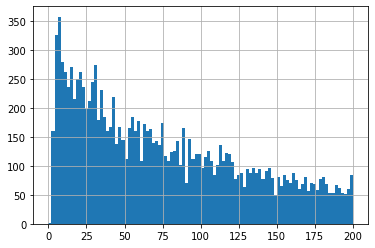

In [25]:
df = df.query('days_exposition != 45 and days_exposition != 60 and days_exposition != 90')
df['days_exposition'].hist(bins = 100, range=(0,200))
df['days_exposition'].describe()

Среднее сремя продажи и медианное значение выросли. Построим теперь диаграмму размаха:

(1, 800)

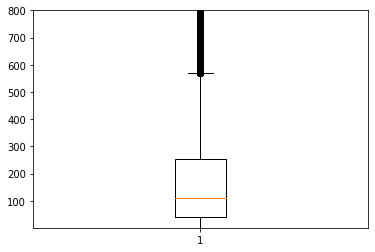

In [26]:
plt.boxplot(df[df['days_exposition'].notnull()]['days_exposition'])
plt.ylim(1,800)

Очень долгие продажи у нас находятся вне "усов". Таковыми считаются те объявления, время публикации которых выше 570 дней. Нижней границы у нас нет, потому все объявления, с продолжительностью публикации от 1 до 570 дней считаются нормальными.

In [27]:
df = df[df['days_exposition'] < 570]

Выше, когда мы изучали гистограммы цены, количества комнат, высоты потолков и общей площади, мы заметили подозрительные значения. Опираясь на тот же самый IQR и логику, составим список значений, которые мы считаем подозрительными:
1) Начнем с количества комнат: Естественно, "прощаемся" с объявлениями, где 0 комнат. Q1 = 1, Q3 = 3. 
Значит, 1,5*IQR=1,5*(3-1)=3. Q3+3=6. Следовательно, квартиры с более, чем 6 комнатами, мы также отсеем.

2) Квартиры дешевле 1 000 000 рублей также не внушают доверия (сами знаем, где бесплатный сыр), потому от них мы тоже избавимся.
Аналогично найдем межквартильный интервал и отметим, что верхний диапазон цены будет равен 11 150 000.

3) С площадью нижнюю границу ставить не будем. Сейчас делают сколь угодно маленькие студии (особенно в центре СПБ, разбивая одну большую коммуналку на множество студий по 15 м²). А вот верхнюю границу интервала найдем таким же способом, как и в предыдущих пунктах. Она будет равна 111 м².

4) Разобраться подобным образом с высотой потолков мешает наша медиана. Когда будем считать зависимость цены от высоты потолков, уберем и ее, а пока возьмем доверительный интервал от 2,3 м до 4,5 метров

In [28]:
df = df[(df['rooms'] <7) & (df['rooms'] >0) & (df['last_price'] < 11150000) & (df['last_price'] > 1000000) & (df['total_area'] < 111) & (df['ceiling_height'] < 4.5) & (df['ceiling_height'] > 2.3)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15627 entries, 1 to 23693
Data columns (total 29 columns):
total_images            15627 non-null int64
last_price              15627 non-null int64
total_area              15627 non-null float64
first_day_exposition    15627 non-null datetime64[ns]
rooms                   15627 non-null int64
ceiling_height          15627 non-null float64
floors_total            15627 non-null int64
living_area             14753 non-null float64
floor                   15627 non-null int64
is_apartment            15627 non-null bool
studio                  15627 non-null bool
open_plan               15627 non-null bool
kitchen_area            14564 non-null float64
balcony                 15627 non-null int64
locality_name           15627 non-null object
airports_nearest        12054 non-null float64
city_centers_nearest    12065 non-null float64
parks_around3000        12065 non-null float64
parks_nearest           4949 non-null float64
ponds_around30

Мы удалили достаточно большую часть данных, но последующий анализ будет куда правильнее без аномальных значений!
А теперь изучим, как цена влияет от определнных факторов. Для этого необходимо посчитать корреляцию цены и интересующих нас параметров.

In [29]:
df_corr = df[[
    'total_area',
    'rooms',
    'city_centers_nearest',
    'last_price',
    'price_per_meter'
]].corr()
display(df_corr)

,total_area,rooms,city_centers_nearest,last_price,price_per_meter
total_area,1.00,0.80,-0.11,0.70,-0.12
rooms,0.80,1.00,-0.07,0.44,-0.26
city_centers_nearest,-0.11,-0.07,1.00,-0.34,-0.40
last_price,0.70,0.44,-0.34,1.00,0.59
price_per_meter,-0.12,-0.26,-0.40,0.59,1.00


Что мы получили:
Цена зависит от площади, что вполне логично: чем больше площадь квартиры, тем выше цена на нее.
Количество комнат зависит от площади квартиры, потому вполне логично, что цена зависит и от количества комнат.
А вот с расстоянием до центра города все иначе: корреляция мала, но при этом отрицательна. То есть, чем больше расстояние до центра, тем ниже цена.

Если говорить о цене за квадратный метр, то в случае с расстоянием до центра города, ситуация аналогична. Близкая к нулю с отрицательной стороны корреляция в парах "цена за квадратный метр - общая площадь" и "цена за квадратный метр - количество комнат". Тоже логичный результат, поскольку "двушка" с площадью 60 м² стоит дешевле, чем две однушки по 30 м² 

Разберемся теперь с тем, как зависит цена от этажа:

In [30]:
df_floor = df.pivot_table(index = 'floor_category', values = ['last_price', 'price_per_meter'], aggfunc = ['mean', 'median'])
display(df_floor)

mean                     median                
                 last_price price_per_meter last_price price_per_meter
floor_category                                                        
другой         4,897,086.43       95,723.56    4500000           95454
первый         4,086,916.86       80,245.01    3800000           81096
последний      4,442,470.42       85,607.51    4050000           86687

Все получилось весьма логично: дешевле всего квадратный метр стоит на первом этаже (у всех на виду, может "дуть" из сходной двери в дом в морозы, вопрос безопасности и прочие). Следом идет цена за квадратный метр на последнем этаже (летом - жарко, зачастую капает с крыши, не всегда есть лифт и тд). Дороже всего квадратный метр стоит на не первом и не последнем этажах. Поскольку мы удалили аномальные значения, для анализа можно использовать и среднее, и медиану (они будут максимально близки друг к другу)

Теперь изучим зависимость цены в зависимости от даты размещения. В предыдущих вариантах мы обращали внимание на общую цену. Скорее, для полноты картины. На самом деле, для исследования нам достаточно цены за квадратный метр. В этом пункте ей и ограничимся:

In [31]:
df_day_exposition = df.pivot_table(index = 'weekday_exposition', values='price_per_meter')
df_month_exposition = df.pivot_table(index = 'month_exposition', values='price_per_meter')
df_year_exposition = df.pivot_table(index = 'year_exposition', values='price_per_meter')
display(df_day_exposition)
display(df_month_exposition)
display(df_year_exposition)

,price_per_meter
weekday_exposition,
0,"92,483.57"
1,"92,234.65"
2,"92,957.56"
3,"92,658.32"
4,"92,255.00"
5,"92,542.45"
6,"92,166.78"


,price_per_meter
month_exposition,
1,"93,207.79"
2,"92,319.83"
3,"92,713.99"
4,"91,998.11"
5,"92,784.18"
6,"90,632.06"
7,"92,316.34"
8,"94,204.91"
9,"94,044.26"


,price_per_meter
year_exposition,
2014,"92,805.67"
2015,"89,092.21"
2016,"89,816.55"
2017,"90,541.98"
2018,"93,911.71"
2019,"103,555.87"


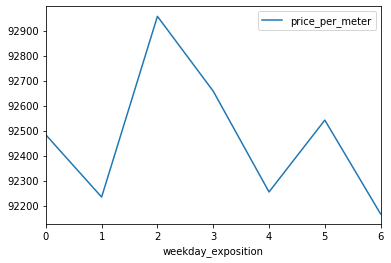

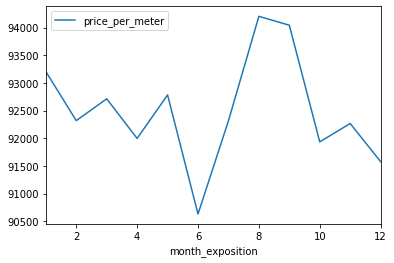

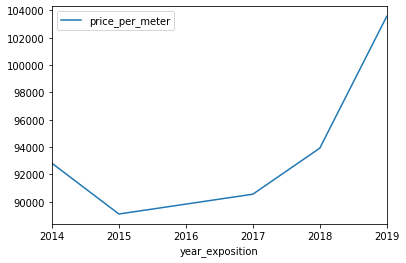

In [32]:
df_day_exposition.plot( y = 'price_per_meter')
df_month_exposition.plot( y = 'price_per_meter')
df_year_exposition.plot( y = 'price_per_meter')

Изменение цены за квадратный метр в течение недели находится в пределах 1000 руб. То есть, не зависит от этого параметра.

В случае изменения таковой по месяцам - к восьмому месяцу она заметно возрастает. Я считаю, это связано с началом учебного года - многие переезжают в Петербург учиться с разных городов России. Ввиду увиличения спроса, возрастают и цены на покупку и съем квартир в это время. Ближе к октябрю ценник "нормализуется" и до июня остается почти неизменным. В июне же многие студенты выпускаются из университетов и достаточно часто переезжают, потому предложение превышает спрос в этот месяц.

Динамика по годам тоже выглядит вполне логично: инфляция; цены растут на все, в том числе и на квартиры.

Далее выберем 10 наиболее часто встречающихся населенных пунктов:

In [33]:
df_ten = df.pivot_table(index = 'locality_name', values = 'price_per_meter', aggfunc = ['count', 'mean']) 
df_ten.columns = ['count', 'mean'] #переименуем столбцы
df_ten = df_ten.sort_values(by = 'count', ascending = False).head(10)
print(df_ten)

                   count       mean
locality_name                      
Санкт-Петербург    10255 103,978.89
посёлок Мурино       433  85,164.33
посёлок Шушары       348  77,687.04
Всеволожск           274  66,590.54
Колпино              261  74,727.77
посёлок Парголово    251  89,646.22
Пушкин               244  99,205.88
деревня Кудрово      229  91,949.84
Гатчина              219  68,127.42
Выборг               157  57,696.96


Выведем на экран строки с населенными пунктами с максимальной и минимальной средней ценой за квадратный метр:

In [34]:
print(df_ten[df_ten['mean'] == df_ten['mean'].max()])
print(df_ten[df_ten['mean'] == df_ten['mean'].min()])

                 count       mean
locality_name                    
Санкт-Петербург  10255 103,978.89
               count      mean
locality_name                 
Выборг           157 57,696.96


Из десяти самых часто встречаемых городов в объявлениях, самой дорогой средней ценой за квадратный метр обладает Санкт-Петурбург - почти 104000 рублей. Самой низкой - Выборг. Здесь цена составляет примерно 57500 рублей.

Далее выясним, какая область квартир входит в центре Санкт-Петербурга. Создадим новый датафрейм, где будут только квартиры из этого города.

In [35]:
df_spb = df[df['locality_name'] == 'Санкт-Петербург']
df_spb = df_spb.dropna(subset=['city_centers_nearest']).reset_index(drop=True)
df_spb['city_centers_km'] = round(df_spb['city_centers_nearest']/1000,0)
df_spb['city_centers_km'] = df_spb['city_centers_km'].astype('int')
display(df_spb)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_per_meter,weekday_exposition,month_exposition,year_exposition,floor_category,living_area_ratio,kitchen_area_ratio,city_centers_km
0,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,False,...,574.00,558.00,92785,3,8,2015,другой,0.61,0.15,14
1,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,48.00,121.00,100000,1,6,2018,другой,0.32,0.41,8
2,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,nan,289.00,88524,6,2,2017,другой,0.71,0.11,15
3,5,5050000,39.60,2017-11-16,1,2.67,12,20.30,3,False,...,553.00,137.00,127525,3,11,2017,другой,0.51,0.21,14
4,16,4650000,39.00,2017-11-18,1,2.65,14,20.50,5,False,...,296.00,19.00,119230,5,11,2017,другой,0.53,0.19,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10237,6,3200000,39.00,2017-12-16,1,2.65,9,20.00,6,False,...,nan,38.00,82051,5,12,2017,другой,0.51,0.28,17
10238,19,9200000,101.00,2019-04-01,3,3.05,15,63.00,12,False,...,nan,23.00,91089,0,4,2019,другой,0.62,0.15,14
10239,13,3550000,35.30,2018-02-28,1,2.86,15,16.30,4,False,...,652.00,29.00,100566,2,2,2018,другой,0.46,0.26,16
10240,3,5500000,52.00,2018-07-19,2,2.65,5,31.00,2,False,...,nan,15.00,105769,3,7,2018,другой,0.60,0.12,6


Создадим сводную таблицу, где для каждого километра будет указана средняя цена за квадратный метр:

In [36]:
df_km_price = df_spb.pivot_table(index = 'city_centers_km', values = 'price_per_meter', aggfunc='mean')
print(df_km_price)

                 price_per_meter
city_centers_km                 
0                     116,347.86
1                     119,804.20
2                     115,566.48
3                     107,008.62
4                     114,878.34
5                     120,255.84
6                     120,797.02
7                     113,801.98
8                     113,519.71
9                     105,117.13
10                    107,217.67
11                    102,432.28
12                    104,687.79
13                    104,565.59
14                    102,154.93
15                    101,122.12
16                     97,870.73
17                     95,080.61
18                     95,255.31
19                     97,127.75
20                     99,436.15
21                     89,925.51
22                     89,776.05
23                     88,281.86
24                     82,440.25
25                     92,613.48
26                     87,269.16
27                     70,312.00
28        

Выведем график зависимости цены от расстояния до центра:

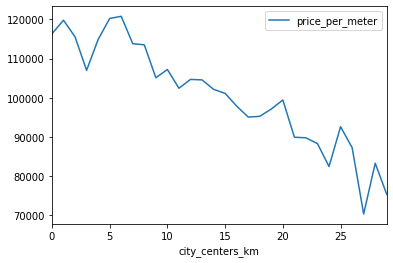

In [37]:
df_km_price.plot()

Получили не совсем то, чего ожидали, поскольку ожидалось распредление Пуассона. Скорее всего, это связано с тем, что мы слишком сильно ограничили максимальную цену, поставив ее равной 11 150 000 и часть значений просто срезалось. 

В целом, мы все равно видим динамику, что с увеличением расстояния до центра, средняя цена за квадратный метр падает. Центром Петербурга считается пространство в радиусе трех километров от Петропавловской крепости - это точка нашего первого излома на графике. Возможно, высокие цены на уровне 5 и 6 км связаны с тем, что примерно на таком расстоянии находится Крестовский остров, где располагаются самые престижные квартиры города. После этих значений график убывает.

Для последующих вычислений ограничим площадь центра до 6 км:

In [38]:
df_spb_center = df_spb[df_spb['city_centers_km'] <=6]

Перезапишем таблицу, оставив лишь те параметры, которые будут нам полезны для ответов на вопросы:

In [39]:
df_spb_center = df_spb_center[['last_price', 'price_per_meter', 'total_area', 'rooms', 'ceiling_height', 'city_centers_km', 'first_day_exposition', 'weekday_exposition', 'month_exposition', 'year_exposition', 'days_exposition']]
display(df_spb_center.head())

,last_price,price_per_meter,total_area,rooms,ceiling_height,city_centers_km,first_day_exposition,weekday_exposition,month_exposition,year_exposition,days_exposition
8,6500000,66872,97.20,2,2.65,2,2015-10-31,5,10,2015,265.00
35,9600000,106666,90.00,4,2.65,3,2017-09-26,1,9,2017,104.00
40,4590000,114750,40.00,1,2.65,6,2017-05-29,0,5,2017,31.00
49,6500000,125482,51.80,2,3.45,4,2018-08-01,2,8,2018,163.00
50,4800000,120000,40.00,2,2.65,3,2017-11-18,5,11,2017,80.00


В самом начале мы приравняли высоту потолков в пропусках к медианному значению, ввиду чего образовался пик, который явно исказит корреляцию, потому уберем эти значения. Их отсутствие не должно повлиять на общий вид графика:

In [40]:
df_spb_center = df_spb_center[df_spb_center['ceiling_height'] != 2.65]

Теперь посмотрим, как цена за квадратный метр коррелирует с остальными параметрами:

In [41]:
df_spb_center_corr = df_spb_center.corr()
display(df_spb_center_corr)

,last_price,price_per_meter,total_area,rooms,ceiling_height,city_centers_km,weekday_exposition,month_exposition,year_exposition,days_exposition
last_price,1.00,0.18,0.68,0.44,0.20,-0.12,0.07,-0.01,0.02,0.12
price_per_meter,0.18,1.00,-0.56,-0.56,-0.12,0.06,0.02,0.00,0.14,-0.08
total_area,0.68,-0.56,1.00,0.80,0.27,-0.14,0.04,-0.01,-0.08,0.16
rooms,0.44,-0.56,0.80,1.00,0.19,-0.14,0.02,-0.00,-0.06,0.13
ceiling_height,0.20,-0.12,0.27,0.19,1.00,-0.26,0.01,0.02,-0.03,-0.02
city_centers_km,-0.12,0.06,-0.14,-0.14,-0.26,1.00,-0.06,-0.04,0.05,-0.01
weekday_exposition,0.07,0.02,0.04,0.02,0.01,-0.06,1.00,0.04,0.01,0.03
month_exposition,-0.01,0.00,-0.01,-0.00,0.02,-0.04,0.04,1.00,-0.20,-0.03
year_exposition,0.02,0.14,-0.08,-0.06,-0.03,0.05,0.01,-0.20,1.00,-0.45
days_exposition,0.12,-0.08,0.16,0.13,-0.02,-0.01,0.03,-0.03,-0.45,1.00


Что же мы получили:
С увеличением площади, цена за квадратный метр падает. При рассмотрении квартир в центр коэффициент Пирсона увеличился почти в 2 раза, что говорит о том, что покупать "однушку" в центре - крайне не выгодно
В остальных случаях коэффициент Пирсона стремится к нулю, что не позволяет нам говорить о полноценноой взаимосвязи между ценой за квадратный метр и другими параметрами.

Осталось определить связь между ценой за квадратный метр и этажом:

In [42]:
df_spb_center_floor = df_spb[df_spb['city_centers_km'] <=6]
df_floor_center = df_spb_center_floor.pivot_table(index='floor_category', values = 'price_per_meter')
print(df_floor_center)

                price_per_meter
floor_category                 
другой               120,421.90
первый               107,805.63
последний            112,238.88


Ситуация аналогична рассмотренной ранее: Самые дешевые квартиры - на первом этаже, далее - последний. Самые дорогие - не на первом, и не на последнем.

**Вывод**

В данном пункте были изучены такие параметры, как цена, число комнат, высота потолков, время продажи. Для каждого были построены гистограммы и удалены значения, являющиеся аномальными

Также были определены факторы, от которых зависит цена квадратного метра квартиры.

Изучены 10 наиболее часто встречающихся населенных пункта. Среди них найдены таковые с максимальной и минимальной средней ценой за квадратный метр.

Определены границы центра города и исследованы зависимости цены квадратного метра от различных факторов в нем.

## Общий вывод

В ходе выполнения проекта была изучена таблица с объявлениямипо продаже квартир в Санкт-Петербурге и Ленинградской области.

Первым делом, были произведены такие операции, как обработка пропусков и замена типов данных в таблице. Далее были добавлены необходимые для дальнейших ответов на вопросы столбцы.

В результате исследовательского анализа данных были определены факторы, влияющие на цену квадратного метра, а следовательно, и самой квартиры. Наиболее весомыми оказались: расстояние до центра города, общая площадь и этаж. Также стоит отметить тенденцию на рост цены с течением времени. Для центра города, в целом, факторы, влиияющие на цену, оказались такими же.